In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random   

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
print('Train size:', x_train.shape[0])
print('Test size:', x_test.shape[0])

Train size: 60000
Test size: 10000


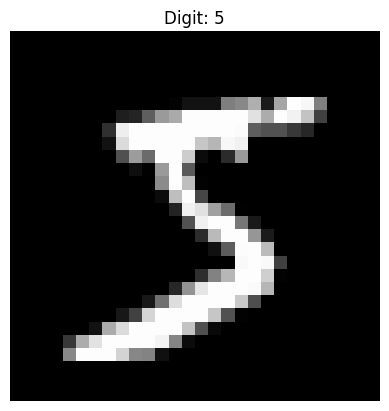

In [7]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Digit: {y_train[0]}")
plt.axis('off')
plt.show()

In [8]:
print('X_train max value:', x_train.max())
print('X_train min value:', x_train.min())

X_train max value: 255
X_train min value: 0


In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
print('X_train max value:', x_train.max())
print('X_train min value:', x_train.min())

X_train max value: 1.0
X_train min value: 0.0


In [11]:
print('Single image shape:', x_train[0].shape)
print('Single image size:', x_train[0].size)

Single image shape: (28, 28)
Single image size: 784


In [12]:
x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)

In [14]:
print('Single image shape:', x_train[0].shape)
print('Single image size:', x_train[0].size)

Single image shape: (784,)
Single image size: 784


In [16]:
from numpy import shape


model = keras.models.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8816 - loss: 0.4175 - val_accuracy: 0.9662 - val_loss: 0.1151
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9662 - loss: 0.1088 - val_accuracy: 0.9697 - val_loss: 0.0916
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.9800 - loss: 0.0670 - val_accuracy: 0.9736 - val_loss: 0.0845
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9842 - loss: 0.0495 - val_accuracy: 0.9736 - val_loss: 0.0924
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9881 - loss: 0.0360 - val_accuracy: 0.9749 - val_loss: 0.0859
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9899 - loss: 0.0307 - val_accuracy: 0.9756 - val_loss: 0.0876
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.9914 - loss: 0.0258 - val_accuracy: 0.9776 - val_loss: 0.0847
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9931 - loss: 0.022

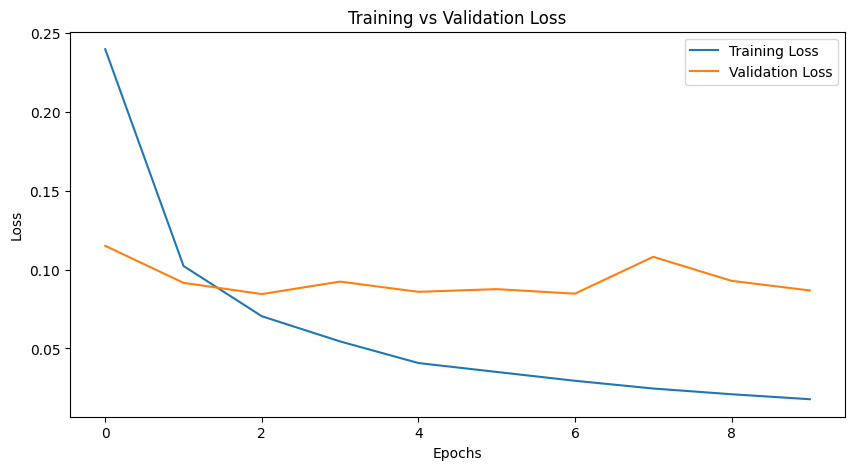

In [21]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9744 - loss: 0.1084
Test accuracy: 0.9798


In [23]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


In [24]:
def plot_image(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
    plt.axis('off')
    plt.show()

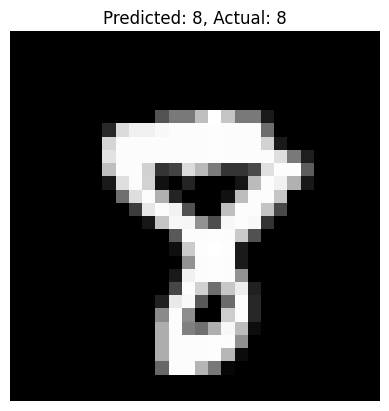

In [25]:
plot_image(233)